# **CAPSTONE PROJECT** - Target customer prediction

## PART 3 - EDA - HOUSEHOLDS ANALYSIS DURING THE TIME FOCUS CAMP IS LAUNCHED

By Chau Tran

## TABLE OF CONTENTS<a id="top3"></a>

* [Load libraries and data](#data3)
* [Hypothesis testing](#hypothesis)
* [Calculate focus campaign cost](#cost)
* [Calculate focus campaign revenue](#revenue)
* [Revenue and basket value of households before launching focus camp](#beforeCamp18Revenue)
* [Coupon redemption rate of households over full 102 weeks](#fullRedemption)


### Load libraries and data<a id="data3"></a>
[Back to top](#top3)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

sns.set(color_codes = True)

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [3]:
# Load data for EDA

households_duringCamp18_full = pd.read_csv('DATA_CLEAN/households_full_duringCamp18.csv')
households_duringCamp18 = pd.read_csv('DATA_CLEAN/households_withDemographic_duringCamp18.csv')
df_promoted_prod_trans = pd.read_csv('DATA_CLEAN/transactions_of_campA18_products.csv')

In [4]:
households_duringCamp18

,household_key,recency,frequency,monetary,rfm_group,rfm_score,segment,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,received_campA_18,redeemed_campA_18,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1,3,9,465.67,333,9,Loyal,305.80,14.84,29.26,0.00,66.64,2.69,13.36,0.00,1,1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,7,4,8,299.41,223,7,Need attention,197.63,11.02,22.74,0.00,45.92,2.00,0.00,11.13,1,0,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
2,8,2,10,478.20,334,10,Loyal,340.61,0.00,43.32,0.00,30.31,0.00,1.68,17.34,1,0,25-34,U,25-34K,Unknown,2 Adults Kids,3,1
3,13,0,35,1606.04,444,12,Champions,627.39,7.65,16.62,307.31,411.52,0.00,0.00,0.00,1,1,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2
4,16,14,2,24.05,111,3,Required activation,22.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,2494,7,3,154.63,212,5,Required activation,103.45,12.52,5.95,0.00,24.78,0.00,0.00,2.84,1,1,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
790,2496,8,6,484.79,224,8,Need attention,278.57,28.33,19.31,0.00,25.13,0.00,0.00,79.52,1,1,45-54,A,75-99K,Homeowner,Unknown,3,1
791,2497,0,22,714.48,444,12,Champions,392.07,8.18,74.97,20.00,84.57,0.00,1.84,84.73,1,0,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown
792,2498,0,22,315.63,443,11,Champions,220.58,10.98,17.77,0.00,43.74,5.98,3.87,0.00,1,0,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown


In [5]:
# Calculate average values for each rfm group

rfm_level_agg = households_duringCamp18.groupby('segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)

print(rfm_level_agg)

                    recency frequency monetary      
                       mean      mean     mean count
segment                                             
Champions               0.7      25.2    833.1   320
Loyal                   2.8      13.8    467.2   216
Need attention          5.9       7.9    269.4   195
Required activation    18.4       3.4    108.0    63


### HYPOTHESIS TESTING<a id="hypothesis"></a>
[Back to top](#top3)

In [6]:
# Null Hypothesis Dictionary
null_hypothesis = {
    'H0': "Total spend does not increase with customer responding to campaign 18."
    , 'H1': "Total spend does increase with customer responding to campaign 18."
    
#     'H0': "Purchase frequency does not increase with customer responding to campaign 18."
#     , 'H1': "Purchase frequency does increase with customer responding to campaign 18."
    
}

def print_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
#     print(p_value,alpha)
    if p_value < alpha:
        print("Reject null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("Fail to reject null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

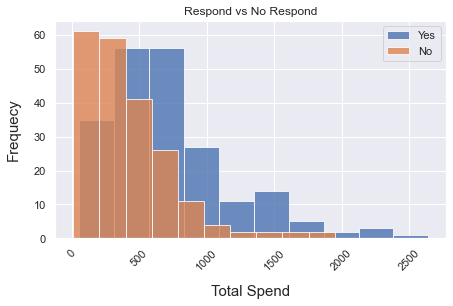

t = 7.869127141896033
p = 3.090195956262247e-14
Reject null hypothesis.
Total spend does increase with customer responding to campaign 18.


In [7]:
# Taking a sample of customers who engaged into the marketing campaigns and who did not to run hypothesis test

from scipy import stats

N = 210
camp_converted = households_duringCamp18_full.query('received_campA_18==1 & redeemed_campA_18==1')['monetary'].sample(N,random_state=42)
camp_not_converted = households_duringCamp18_full.query('received_campA_18==1 & redeemed_campA_18==0')['monetary'].sample(N,random_state=42)

fig = plt.figure(figsize=(7,4))
plt.hist(camp_converted,alpha=0.8)
plt.hist(camp_not_converted,alpha=0.8)
plt.xlabel('{}'.format('Total Spend'), size=15,labelpad=12.5)
plt.ylabel('Frequecy', size=15, labelpad=12.5)
plt.legend(['Yes','No'])
plt.xticks(rotation=45)
plt.title('Respond vs No Respond')
plt.show()
# fig.savefig('Yes_vs_No.png',transparent=False, bbox_inches='tight', dpi=300)

alpha = 0.05

t, p = stats.ttest_ind(camp_converted, camp_not_converted)
print("t = " + str(t))
print("p = " + str(p))
print_sig(p, alpha)

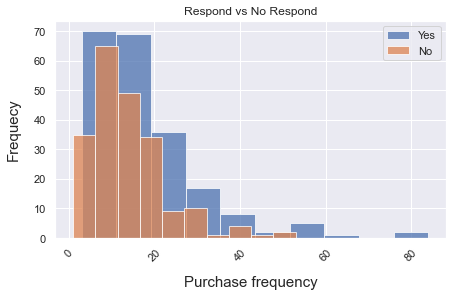

t = 4.561514295115692
p = 6.682897765153991e-06
Reject null hypothesis.
Total spend does increase with customer responding to campaign 18.


In [8]:
# Taking a sample of customers who engaged into the marketing campaigns and who did not to run hypothesis test

N = 210
camp_converted = households_duringCamp18_full.query('received_campA_18==1 & redeemed_campA_18==1')['frequency'].sample(N,random_state=42)
camp_not_converted = households_duringCamp18_full.query('received_campA_18==1 & redeemed_campA_18==0')['frequency'].sample(N,random_state=42)

fig = plt.figure(figsize=(7,4))
plt.hist(camp_converted,alpha=0.75)
plt.hist(camp_not_converted,alpha=0.75)
plt.xlabel('{}'.format('Purchase frequency'), size=15,labelpad=12.5)
plt.ylabel('Frequecy', size=15, labelpad=12.5)
plt.legend(['Yes','No'])
plt.xticks(rotation=45)
plt.title('Respond vs No Respond')
plt.show()
# fig.savefig('Yes_vs_No.png',transparent=False, bbox_inches='tight', dpi=300)

alpha = 0.05

t, p = stats.ttest_ind(camp_converted, camp_not_converted)
print("t = " + str(t))
print("p = " + str(p))
print_sig(p, alpha)

### Calculate campaign 18 cost<a id="cost"></a>
[Back to top](#top3)

In [9]:
cus_id_all = households_duringCamp18_full.household_key.unique()
cus_id_campA = households_duringCamp18_full[households_duringCamp18_full.received_campA_18==1].household_key.unique()
cus_id_campA_not_receive = set(cus_id_all)-(set(cus_id_campA))
cus_id_campA_redeemed = households_duringCamp18_full[households_duringCamp18_full.redeemed_campA_18==1].household_key.unique()
cus_id_campA_not_redeemed = set(cus_id_campA)-(set(cus_id_campA_redeemed))

print('Total households',len(cus_id_all))
print('Households received campaign 18 offers',len(cus_id_campA))
print('Households did not receive campaigns',len(cus_id_campA_not_receive))
print('Households redeemed coupons',len(cus_id_campA_redeemed))
print('Households received coupons but did not redeem',len(cus_id_campA_not_redeemed))

Total households 2237
Households received campaign 18 offers 1104
Households did not receive campaigns 1133
Households redeemed coupons 214
Households received coupons but did not redeem 890


In [10]:
cus_id_buy_promoted_prod = df_promoted_prod_trans.household_key.unique()
len(cus_id_buy_promoted_prod)

2173

In [11]:
cus_id_campA_not_receive_converted = set(cus_id_buy_promoted_prod).intersection(set(cus_id_campA_not_receive))

cus_id_campA_not_redeemed_converted = set(cus_id_buy_promoted_prod).intersection(set(cus_id_campA_not_redeemed))

cus_id_campA_redeemed_converted = set(cus_id_buy_promoted_prod).intersection(set(cus_id_campA_redeemed))

In [14]:
total_sales_from_converted_cus = df_promoted_prod_trans[df_promoted_prod_trans.household_key.isin(cus_id_campA_redeemed_converted)].sales_value.sum()
total_discount_from_converted_cus = df_promoted_prod_trans[df_promoted_prod_trans.household_key.isin(cus_id_campA_redeemed_converted)].coupon_disc.sum()
total_match_discount_from_converted_cus = df_promoted_prod_trans[df_promoted_prod_trans.household_key.isin(cus_id_campA_redeemed_converted)].coupon_match_disc.sum()
total_loyalty_discount_from_converted_cus = df_promoted_prod_trans[df_promoted_prod_trans.household_key.isin(cus_id_campA_redeemed_converted)].retail_disc.sum()

print('Total sales from converted customers',round(total_sales_from_converted_cus,2))
print('Total coupon value discount',round(total_discount_from_converted_cus,2))
print('Total loyalty discount',round(total_loyalty_discount_from_converted_cus,2))

cost1 = abs(total_discount_from_converted_cus+total_loyalty_discount_from_converted_cus)
# ad cost of 1104 households
cost2 = 1104 * 5
cost3 = (cost1 + cost2)*0.20
total_cost = cost1 + cost2 + cost3
print('Cost - discount',cost1)
print('Cost - advertisement',cost2)
print('Cost - other',cost3)

print('Total cost',total_cost)
print('Total cost vs revenue from campaign', round(total_cost/total_sales_from_converted_cus,2))
print('ROI',round((total_sales_from_converted_cus - total_cost)/total_cost*100,2))

Total sales from converted customers 71501.46
Total coupon value discount -1163.6
Total loyalty discount -16598.52
Cost - discount 17762.12
Cost - advertisement 5520
Cost - other 4656.424
Total cost 27938.543999999998
Total cost vs revenue from campaign 0.39
ROI 155.92


### Calculate campaign 18 revenue<a id="revenue"></a>
[Back to top](#top3)

In [26]:

# calculate total revenue value of each marketing groups
a = df_promoted_prod_trans.sales_value.sum()
b = df_promoted_prod_trans[df_promoted_prod_trans.household_key.isin(cus_id_campA_redeemed)].sales_value.sum()
c = df_promoted_prod_trans[df_promoted_prod_trans.household_key.isin(cus_id_campA_not_redeemed)].sales_value.sum()
d = df_promoted_prod_trans[df_promoted_prod_trans.household_key.isin(cus_id_campA_not_receive)].sales_value.sum()

h = len(cus_id_campA_redeemed) / len(cus_id_campA_not_redeemed)
i = b / c

# calculate average basket value of each marketing groups during campaign time
j = df_promoted_prod_trans[df_promoted_prod_trans.household_key.isin(cus_id_campA_redeemed)].groupby('basket_id').sales_value.sum().mean()
k = df_promoted_prod_trans[df_promoted_prod_trans.household_key.isin(cus_id_campA_not_redeemed)].groupby('basket_id').sales_value.sum().mean()
l = df_promoted_prod_trans[df_promoted_prod_trans.household_key.isin(cus_id_campA_not_receive)].groupby('basket_id').sales_value.sum().mean()

# calculate average frequency of each marketing groups during campaign time
m = df_promoted_prod_trans[df_promoted_prod_trans.household_key.isin(cus_id_campA_redeemed)].groupby('household_key').basket_id.nunique().mean()
n = df_promoted_prod_trans[df_promoted_prod_trans.household_key.isin(cus_id_campA_not_redeemed)].groupby('household_key').basket_id.nunique().mean()
o = df_promoted_prod_trans[df_promoted_prod_trans.household_key.isin(cus_id_campA_not_receive)].groupby('household_key').basket_id.nunique().mean()
m = round(m,2)
n = round(n,2)
o = round(o,2)

print('Total revenue from campaign18', round(a,2))
print('Total revenue from customers with redemption', round(b,2))
print('Total revenue from customers who did not redeem', round(c,2))
print('Total revenue from customers who did not receive offers', round(d,2))

print(f'Sale ratio of converted vs non-converted {round(i,2)}')
print(f'Household ratio of converted vs non-converted {round(h,2)}')




Total revenue from campaign18 350833.49
Total revenue from customers with redemption 71501.46
Total revenue from customers who did not redeem 174646.94
Total revenue from customers who did not receive offers 104685.09
Sale ratio of converted vs non-converted 0.41
Household ratio of converted vs non-converted 0.24


In [27]:
data = {'group':['Redeemed','Did not redeem','Did not receive offers'],
        'household_count':[len(cus_id_campA_redeemed),len(cus_id_campA_not_redeemed),len(cus_id_campA_not_receive)],
        'revenue':[b,c,d],
        'mean_basket_value':[j,k,l],
        'mean_frequency':[m,n,o]}

revenue_df = pd.DataFrame.from_dict(data)
revenue_df

,group,household_count,revenue,mean_basket_value,mean_frequency
0,Redeemed,214,71501.46,24.562508,13.60
1,Did not redeem,890,174646.94,19.306538,10.26
2,Did not receive offers,1133,104685.09,18.710472,5.19


In [51]:
revenue_df['household_ratio'] = round(revenue_df.household_count / revenue_df.household_count.sum(),2)
revenue_df['revenue_ratio'] = round(revenue_df.revenue / revenue_df.revenue.sum(),2)
revenue_df = revenue_df.sort_values('household_count',ascending=False)
revenue_df

,group,household_count,revenue,mean_basket_value,mean_frequency,household_ratio,revenue_ratio
2,Did not receive offers,1133,104685.09,18.710472,5.19,0.51,0.3
1,Did not redeem,890,174646.94,19.306538,10.26,0.40,0.5
0,Redeemed,214,71501.46,24.562508,13.60,0.10,0.2


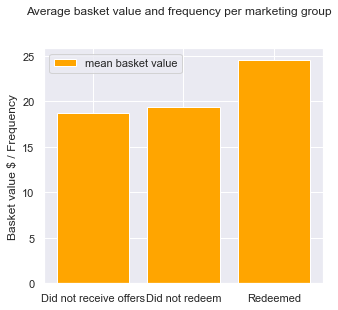

In [99]:
fig = plt.figure(figsize=(5,4.5))
fig.subplots_adjust(hspace=0.9, wspace=0.9, top=0.85)
    
plt.bar(revenue_df.group, revenue_df.mean_basket_value, label='mean basket value',color=['orange', 'orange', 'orange'])
# plt.bar(revenue_df.group, revenue_df.mean_frequency, label='mean frequency')

plt.legend()
# plt.xlabel('Customer groups')
plt.ylabel('Basket value $ / Frequency')
fig.suptitle('Average basket value and frequency per marketing group')
plt.show()

### Check revenue and basket value of households before focus camp was launched<a id="beforeCamp18Revenue"></a>
[Back to top](#top3)

In [70]:
household_beforeCamp18 = pd.read_csv('DATA_CLEAN/households_withDemographic_beforeCamp18.csv')
household_beforeCamp18

,household_key,received_campaign,redeemed_coupons,TypeA,TypeB,TypeC,total_campaigns_received,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,recency,frequency,monetary,rfm_group,rfm_score,segment,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,received_campA_18,redeemed_campA_18,zip_code,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1,1,1,2.0,2.0,0.0,4.0,3.0,80.0,3.0,0.75,0.04,5,67,3362.46,333,9,Loyal,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,7,1,0,0.0,3.0,0.0,3.0,0.0,45.0,0.0,0.00,0.00,10,38,2320.50,223,7,Need attention,1184.37,116.15,168.34,0.00,497.99,4.98,0.00,175.52,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,40243,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
2,8,1,1,2.0,6.0,0.0,8.0,1.0,136.0,1.0,0.12,0.01,0,90,4113.90,434,11,Champions,2208.33,45.47,183.04,188.94,688.08,11.98,50.55,261.88,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,37211,25-34,U,25-34K,Unknown,2 Adults Kids,3,1
3,13,1,1,2.0,4.0,0.0,6.0,11.0,82.0,11.0,1.83,0.13,0,207,10138.40,444,12,Champions,3692.39,47.65,232.49,2472.86,2187.85,3.31,10.09,19.13,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,62946,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2
4,16,1,0,1.0,1.0,0.0,2.0,0.0,32.0,0.0,0.00,0.00,4,92,1471.45,332,8,Need attention,785.67,97.87,86.97,192.30,68.29,8.86,6.43,95.79,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40241,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,2494,1,0,0.0,1.0,0.0,1.0,0.0,19.0,0.0,0.00,0.00,14,26,1560.15,212,5,Required activation,792.41,76.92,182.04,72.85,162.72,3.99,0.00,82.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,42301,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
797,2496,1,1,2.0,1.0,1.0,4.0,4.0,77.0,4.0,1.00,0.05,7,53,3610.50,224,8,Need attention,1453.34,67.71,215.74,304.01,305.72,7.79,0.00,968.75,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,38401,45-54,A,75-99K,Homeowner,Unknown,3,1
798,2497,1,0,2.0,0.0,0.0,2.0,0.0,32.0,0.0,0.00,0.00,3,183,5619.49,344,11,Champions,3355.06,208.50,610.40,0.00,456.01,0.00,3.94,582.62,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,40211,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown
799,2498,1,0,2.0,2.0,1.0,5.0,0.0,65.0,0.0,0.00,0.00,1,130,2119.21,443,11,Champions,1435.60,33.63,66.62,0.00,217.29,35.40,9.53,20.44,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,40241,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown


In [71]:
household_beforeCamp18.groupby('segment').received_campA_18.sum()


segment
Champions              307
Loyal                  230
Need attention         104
Required activation      2
Name: received_campA_18, dtype: int64

In [72]:
household_beforeCamp18.groupby('segment').redeemed_campA_18.sum()

segment
Champions              91
Loyal                  52
Need attention         22
Required activation     1
Name: redeemed_campA_18, dtype: int64

In [73]:
household_beforeCamp18_full = pd.read_csv('DATA_CLEAN/households_full_beforeCamp18.csv')
household_beforeCamp18_full.head()

,household_key,received_campaign,redeemed_coupons,TypeA,TypeB,TypeC,total_campaigns_received,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,recency,frequency,monetary,rfm_group,rfm_score,segment,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,received_campA_18,redeemed_campA_18,zip_code,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1,1,1,2.0,2.0,0.0,4.0,3.0,80.0,3.0,0.75,0.04,5,67,3362.46,333,9,Loyal,2158.21,158.50,206.80,0.00,374.38,43.64,12.69,17.91,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,3,39,1621.59,322,7,Need attention,912.54,42.74,120.33,0.00,274.10,7.47,0.00,128.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,40342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,0,2.0,0.0,1.0,3.0,0.0,58.0,0.0,0.00,0.00,10,44,2554.98,223,7,Need attention,1737.61,36.47,68.03,20.01,146.78,0.00,1.36,298.43,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,37211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,0,1.0,0.0,0.0,1.0,0.0,16.0,0.0,0.00,0.00,2,27,1080.72,312,6,Need attention,639.41,6.37,4.87,0.00,275.18,3.29,0.00,38.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,23,36,735.84,122,5,Required activation,319.18,80.03,2.19,0.00,201.81,0.00,0.00,49.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42718,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
household_beforeCamp18_full.groupby('segment').received_campA_18.sum()


segment
Champions              442
Loyal                  397
Need attention         268
Required activation     26
Name: received_campA_18, dtype: int64

In [75]:
household_beforeCamp18_full.groupby('segment').redeemed_campA_18.sum()

segment
Champions              110
Loyal                   67
Need attention          34
Required activation      3
Name: redeemed_campA_18, dtype: int64

In [76]:
data = {'segment':['Required activation','Need attention','Loyal','Champions'],
        'received_camp18_coupons':[26, 268,397,442],
        'redeemed_camp18_coupons':[3,34,67,110],
        }

segment_df = pd.DataFrame.from_dict(data)
segment_df

,segment,received_camp18_coupons,redeemed_camp18_coupons
0,Required activation,26,3
1,Need attention,268,34
2,Loyal,397,67
3,Champions,442,110


In [77]:
segment_df['redemption_ratio'] = round(segment_df.redeemed_camp18_coupons / segment_df.received_camp18_coupons,2)
segment_df['received_ratio'] = round(segment_df.received_camp18_coupons / sum(segment_df.received_camp18_coupons),2)

In [78]:
segment_df

,segment,received_camp18_coupons,redeemed_camp18_coupons,redemption_ratio,received_ratio
0,Required activation,26,3,0.12,0.02
1,Need attention,268,34,0.13,0.24
2,Loyal,397,67,0.17,0.35
3,Champions,442,110,0.25,0.39


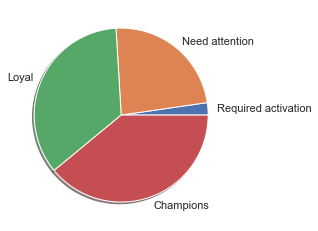

In [79]:
y = segment_df.received_camp18_coupons
labels_setting = ['Required activation','Need attention','Loyal','Champions']

plt.pie(y, labels = labels_setting, shadow = True)
plt.show() 

<BarContainer object of 4 artists>

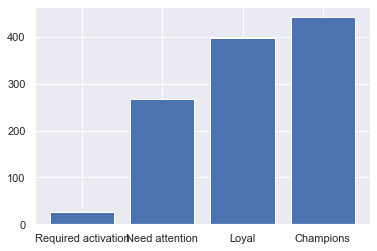

In [42]:

plt.bar(segment_df.segment, segment_df.received_camp18_coupons)


<BarContainer object of 4 artists>

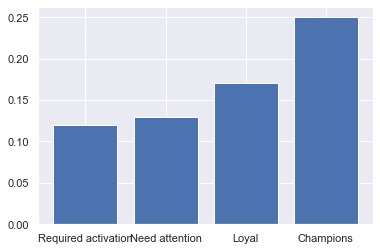

In [43]:
plt.bar(segment_df.segment, segment_df.redemption_ratio)

(array([123.,   0.,   0., 239.,   0.,   0., 177.,   0.,   0., 234.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

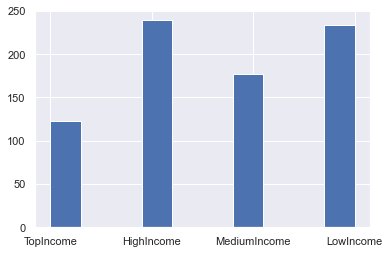

In [4]:
plt.hist(df_household_demo.zipcode_segment)

In [5]:
df_household_demo.groupby(['redeemed_campA_18','zipcode_segment']).agg({'household_key':'count'})

household_key
redeemed_campA_18 zipcode_segment               
0                 HighIncome                 176
                  LowIncome                  185
                  MediumIncome               148
                  TopIncome                  102
1                 HighIncome                  63
                  LowIncome                   49
                  MediumIncome                29
                  TopIncome                   21

<AxesSubplot:xlabel='segment'>

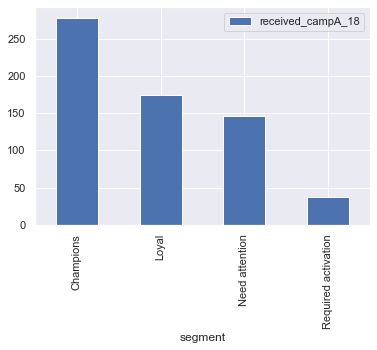

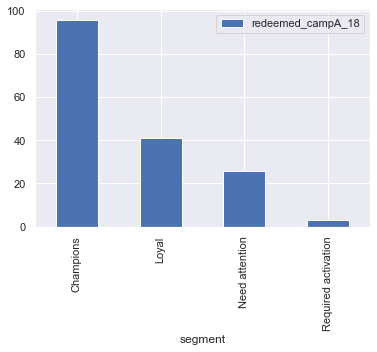

In [54]:
households_duringCamp18.groupby('segment').agg({'received_campA_18':'sum'}).plot.bar()
households_duringCamp18.groupby('segment').agg({'redeemed_campA_18':'sum'}).plot.bar()

In [80]:
d1 = households_duringCamp18.groupby('segment').agg({'received_campA_18':'sum'}).reset_index()
d2 = households_duringCamp18.groupby('segment').agg({'redeemed_campA_18':'sum'}).reset_index()
d3 = d1.merge(d2, on='segment')
d3['redemption_rate'] = d3.redeemed_campA_18 / d3.received_campA_18
d3

,segment,received_campA_18,redeemed_campA_18,redemption_rate
0,Champions,279,96,0.344086
1,Loyal,174,41,0.235632
2,Need attention,147,26,0.176871
3,Required activation,37,3,0.081081


<AxesSubplot:>

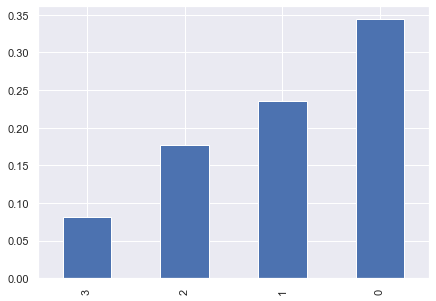

In [85]:
plt.figure(figsize=(7,5))
d3.sort_values('redemption_rate',ascending=True).redemption_rate.plot.bar()

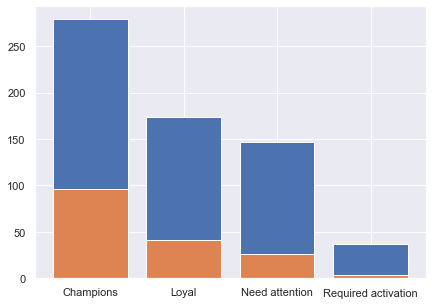

In [86]:
plt.figure(figsize=(7,5))
plt.bar(d3.segment, d3.received_campA_18)
plt.bar(d3.segment, d3.redeemed_campA_18)
plt.show()

<BarContainer object of 4 artists>

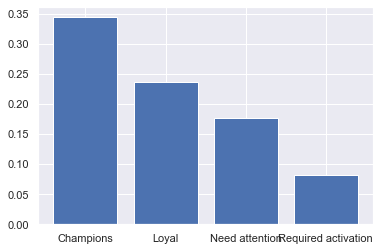

In [62]:
plt.bar(d3.segment, d3.redemption_rate)

In [65]:
d4 = households_duringCamp18.query('redeemed_campA_18==1')
d4 =  d4.groupby('segment').agg({'monetary':'sum'}).sort_values('monetary').reset_index()
d4

,segment,monetary
0,Required activation,278.56
1,Need attention,9341.84
2,Loyal,25014.24
3,Champions,94927.51


<BarContainer object of 4 artists>

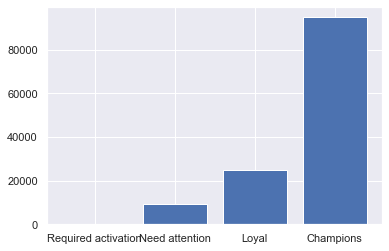

In [66]:
plt.bar(d4.segment, d4.monetary)

### Checking coupon redemption rate over full period of 102 weeks<a id="fullRedemption"></a>
[Back to top](#top)

In [44]:
household_full = pd.read_csv('DATA_CLEAN/households_full.csv')
household_full.head()

,household_key,received_campaign,redeemed_coupons,TypeA,TypeB,TypeC,total_campaigns_received,total_campaigns_engaged,total_coupons_received,total_coupons_redeemed,camp_conversion_rate,coupon_conversion_rate,recency,frequency,monetary,rfm_group,rfm_score,segment,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,NUTRITION_spend,SALAD BAR_spend,MEAT_spend,campA_26_converted,campA_30_converted,campA_8_converted,campA_13_converted,campA_18_converted,campB_28_converted,campB_29_converted,campB_1_converted,campB_2_converted,campB_4_converted,campB_5_converted,campB_7_converted,campB_9_converted,campB_10_converted,campB_12_converted,campB_11_converted,campB_16_converted,campB_17_converted,campB_19_converted,campB_22_converted,campB_21_converted,campB_23_converted,campB_25_converted,campB_24_converted,campC_27_converted,campC_3_converted,campC_6_converted,campC_14_converted,campC_15_converted,campC_20_converted,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1,1,1,3.0,4.0,1.0,8.0,5.0,159.0,5.0,0.62,0.03,5,86,4330.16,333,9,Loyal,2755.00,212.17,266.10,0.00,530.89,48.33,41.20,17.91,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,2,1,0,1.0,0.0,0.0,1.0,0.0,16.0,0.0,0.00,0.00,43,45,1954.34,122,5,Required activation,1112.49,46.73,152.28,0.00,330.04,7.47,0.00,154.32,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,0,2.0,0.0,1.0,3.0,0.0,58.0,0.0,0.00,0.00,8,47,2653.21,223,7,Need attention,1784.75,36.47,68.03,20.01,159.08,0.00,1.36,317.27,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,0,1.0,0.0,0.0,1.0,0.0,16.0,0.0,0.00,0.00,84,30,1200.11,112,4,Required activation,698.73,14.35,4.87,0.00,318.98,3.29,0.00,38.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,8,40,779.06,221,5,Required activation,359.13,80.03,2.19,0.00,203.08,2.00,0.00,49.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
household_full.groupby('segment').received_campaign.sum()

segment
Champions              484
Loyal                  481
Need attention         517
Required activation    102
Name: received_campaign, dtype: int64

In [46]:
household_full.groupby('segment').redeemed_coupons.sum()

segment
Champions              226
Loyal                  120
Need attention          82
Required activation      6
Name: redeemed_coupons, dtype: int64

In [47]:
data = {'segment':['Required activation','Need attention','Loyal','Champions'],
        'received_coupons':[102,517,481,484],
        'redeemed_coupons':[6,82,120,226],
        }

segment_df_full = pd.DataFrame.from_dict(data)
segment_df_full['redemption_ratio'] = round(segment_df_full.redeemed_coupons / segment_df_full.received_coupons,2)
segment_df_full['received_ratio'] = round(segment_df_full.received_coupons / sum(segment_df_full.received_coupons),2)
segment_df_full

,segment,received_coupons,redeemed_coupons,redemption_ratio,received_ratio
0,Required activation,102,6,0.06,0.06
1,Need attention,517,82,0.16,0.33
2,Loyal,481,120,0.25,0.30
3,Champions,484,226,0.47,0.31


<BarContainer object of 4 artists>

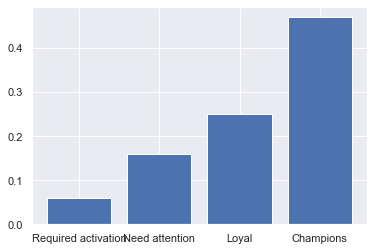

In [48]:

plt.bar(segment_df_full.segment, segment_df_full.redemption_ratio)


<BarContainer object of 4 artists>

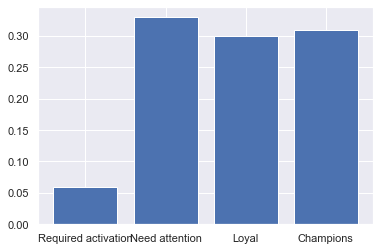

In [49]:
plt.bar(segment_df_full.segment, segment_df_full.received_ratio)